# UTS MPML

### Import Data

Menginstall packages RCurl

In [1]:
install.packages("RCurl")

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\Rtmp8iGwgd\downloaded_packages


Mengimport data dari github menggunakan packages RCurl

In [8]:
library(RCurl)
url <- "https://raw.githubusercontent.com/aliiuii/UTS-MPML/refs/heads/main/dataset/DIY.csv"
csv_text <- getURL(url, .encoding = "UTF-8")
diy <- read.csv(text = csv_text, fileEncoding = "UTF-8-BOM")

Warning message:
"package 'RCurl' was built under R version 4.4.3"


Menampilkan Data

In [9]:
View(diy)

Kabupaten       APK   PDRB    
1 Kulon Progo     96.19 15847.21
2 Bantul          79.48 34011.59
3 Gunung Kidul    92.28 24976.31
4 Sleman          95.59 59431.54
5 Kota Yogyakarta 95.90 46192.50

### Clustering

#### Hierarchical Clustering

Instalasi dan memuat package

In [10]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

install.packages("cluster")
install.packages("dendextend")

Loading required package: devtools

Warning message:
"package 'devtools' was built under R version 4.4.3"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 4.4.3"

Please download and install Rtools 4.4 from https://cran.r-project.org/bin/windows/Rtools/.

Skipping install of 'factoextra' from a github remote, the SHA1 (1689fc74) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'cluster' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cluster'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\ASUS\AppData\Local\R\win-library\4.4\00LOCK\cluster\libs\x64\cluster.dll to C:\Users\ASUS\AppData\Local\R\win-library\4.4\cluster\libs\x64\cluster.dll: Permission denied"
Warning message:
"restored 'cluster'"



The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpkJ7LI1\downloaded_packages


Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpkJ7LI1\downloaded_packages


In [11]:
library(cluster)
library(dendextend)
library(factoextra)

Warning message:
"package 'cluster' was built under R version 4.4.3"
Warning message:
"package 'dendextend' was built under R version 4.4.3"

---------------------
Welcome to dendextend version 1.19.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Normalisasi Data

In [12]:
diy_numeric <- diy[sapply(diy, is.numeric)]
diy_scaled <- scale(diy_numeric)
head(diy_scaled)

APK         PDRB      
[1,]  0.60474654 -1.1764500
[2,] -1.74423409 -0.1208864
[3,]  0.05510475 -0.6459422
[4,]  0.52040253  1.3563111
[5,]  0.56398027  0.5869675

Perhitungan Jarak dan Clustering

In [13]:
diy_dist <- dist(diy_scaled)

Melakukan hierarchical clustering dengan metode average linkage

In [14]:
hc <- hclust(diy_dist, method = "average")

Memotong dendrogram untuk membentuk 2 cluster

In [15]:
hc_clusters <- cutree(hc, k = 2)

#### K-Means Clustering

Menentukan jumlah cluster optimal menggunakan metode WSS

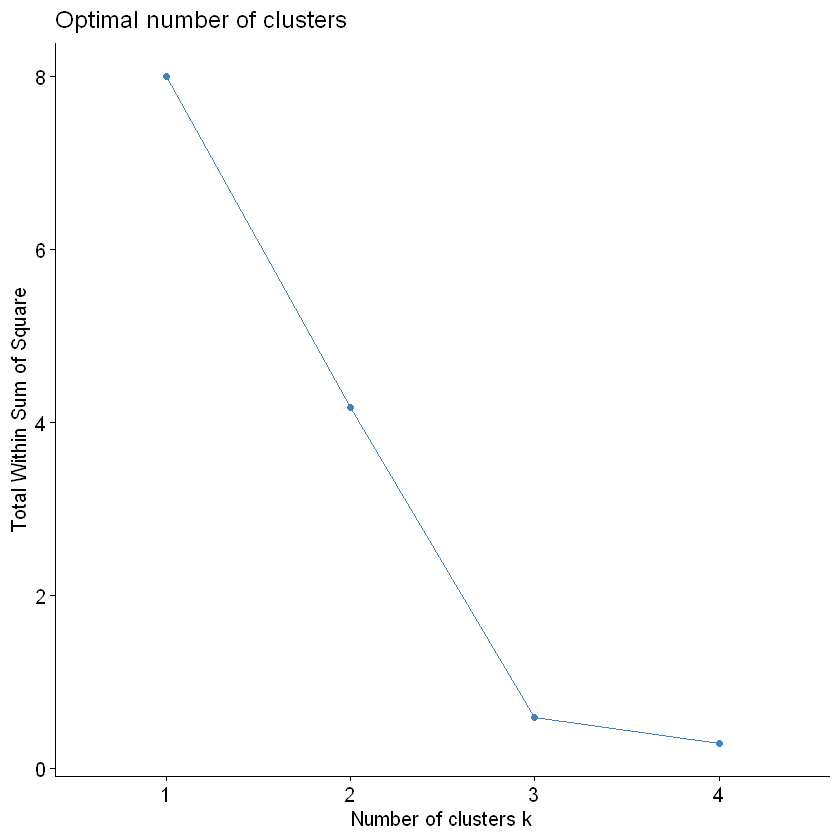

In [16]:
fviz_nbclust(diy_scaled, kmeans, method = "wss", k.max = min(10, nrow(diy_scaled) - 1))

K-Means clustering dengan k = 2

In [17]:
set.seed(123)
km <- kmeans(diy_scaled, centers = 2, nstart = 25)

Menyimpan hasil cluster

In [18]:
km_clusters <- km$cluster

#### DBSCAN

Instalasi dan memuat package

In [19]:
install.packages("dbscan")

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dbscan' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dbscan'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\ASUS\AppData\Local\R\win-library\4.4\00LOCK\dbscan\libs\x64\dbscan.dll to C:\Users\ASUS\AppData\Local\R\win-library\4.4\dbscan\libs\x64\dbscan.dll: Permission denied"
Warning message:
"restored 'dbscan'"



The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpkJ7LI1\downloaded_packages


In [20]:
library(dbscan)

Warning message:
"package 'dbscan' was built under R version 4.4.3"

Attaching package: 'dbscan'


The following object is masked from 'package:stats':

    as.dendrogram




Menentukan nilai epsilon dengan kNN distance plot

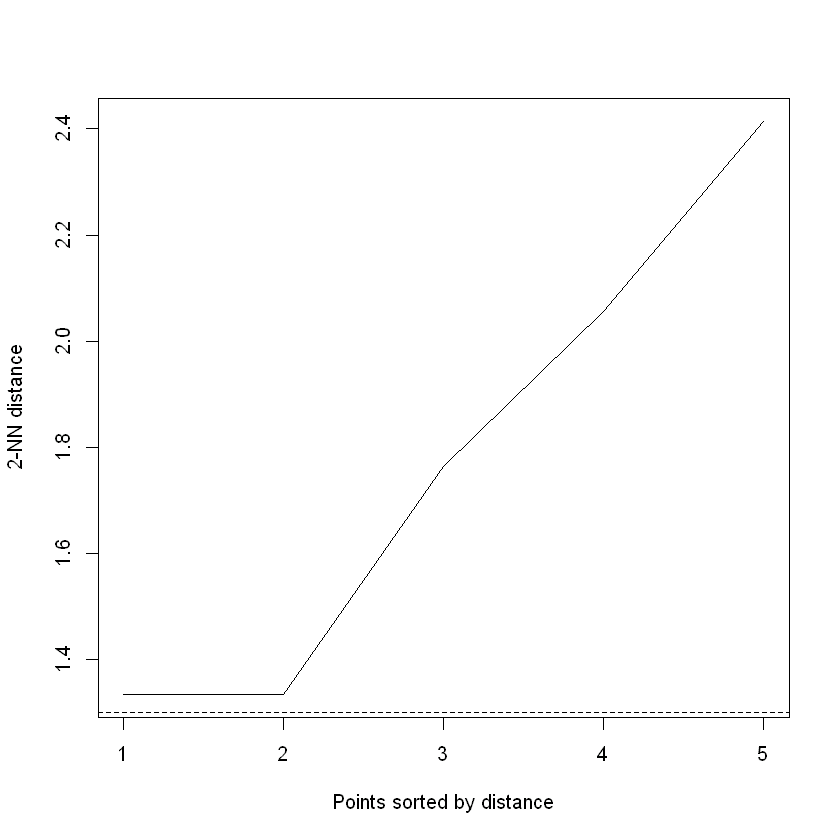

In [21]:
kNNdistplot(diy_scaled, k = 2)
abline(h = 1.3, lty = 2)

Melakukan clustering dengan DBSCAN

In [22]:
db <- dbscan(diy_scaled, eps = 1.3, minPts = 2)

Menyimpan hasil cluster

In [23]:
db_clusters <- db$cluster

### Visualisasi Hasil Clustering

Hierarchical Clustering

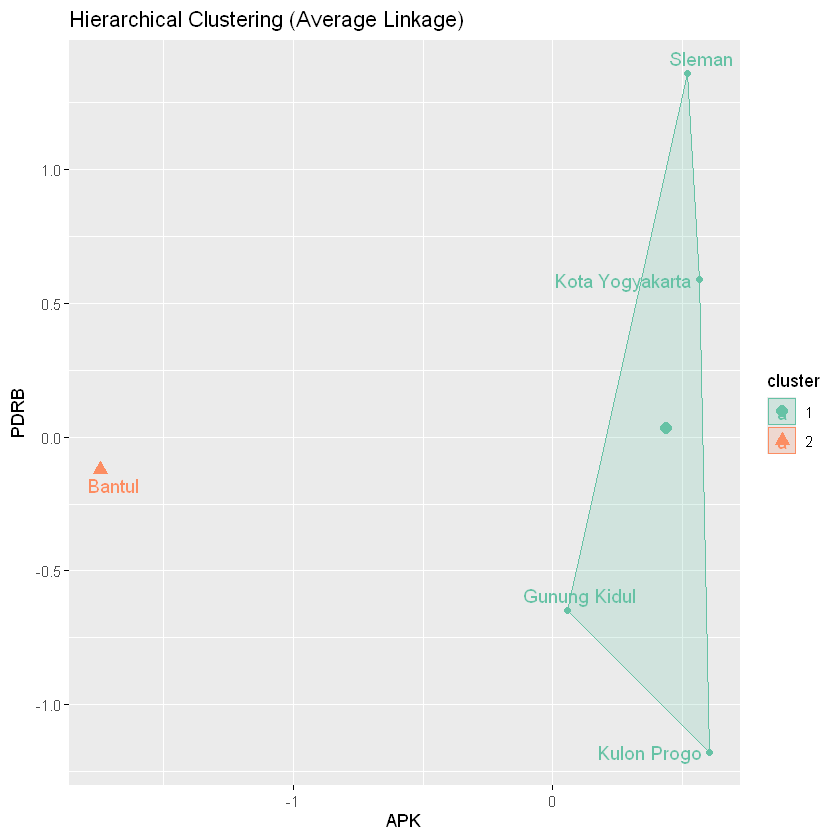

In [24]:
rownames(diy_scaled) <- diy[, 1]
fviz_cluster(list(data = diy_scaled, cluster = hc_clusters),
             main = "Hierarchical Clustering (Average Linkage)",
             palette = "Set2", repel = TRUE)

K-Means Clustering

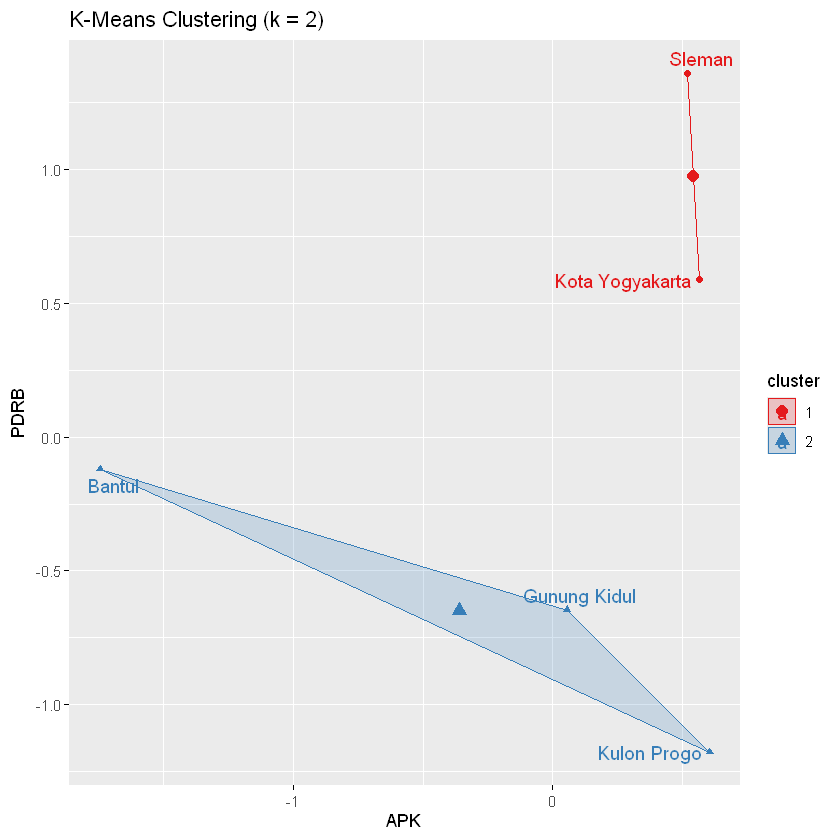

In [98]:
fviz_cluster(km, data = diy_scaled,
             main = "K-Means Clustering (k = 2)",
             palette = "Set1", repel = TRUE)

DBSCAN

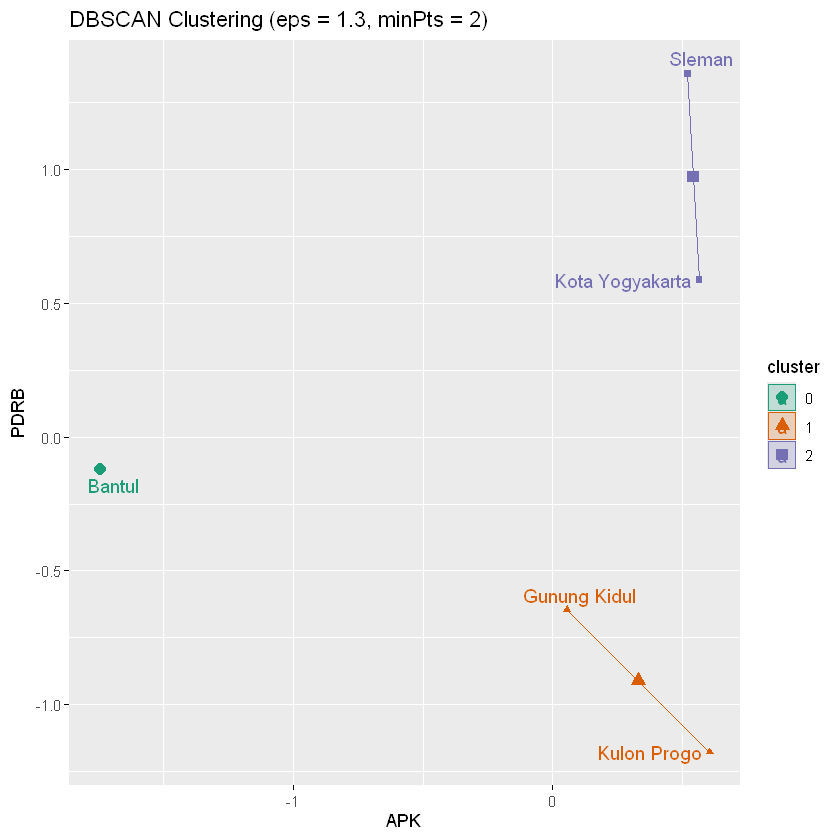

In [27]:
fviz_cluster(list(data = diy_scaled, cluster = db_clusters),
             main = "DBSCAN Clustering (eps = 1.3, minPts = 2)",
             palette = "Dark2", repel = TRUE)

### Visualisasi dalam Peta untuk Hasil Clustering

Menginstall packages

In [105]:
install.packages(c("sf", "dplyr", "patchwork", "geojsonio"))

Warning message:
"packages 'sf', 'dplyr', 'patchwork' are in use and will not be installed"
Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'triebeard', 'urltools', 'httpcode', 'protolite', 'crul', 'geojson', 'jqr', 'V8'




package 'triebeard' successfully unpacked and MD5 sums checked
package 'urltools' successfully unpacked and MD5 sums checked
package 'httpcode' successfully unpacked and MD5 sums checked
package 'protolite' successfully unpacked and MD5 sums checked
package 'crul' successfully unpacked and MD5 sums checked
package 'geojson' successfully unpacked and MD5 sums checked
package 'jqr' successfully unpacked and MD5 sums checked
package 'V8' successfully unpacked and MD5 sums checked
package 'geojsonio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpkJ7LI1\downloaded_packages


Memuat packages

In [106]:
library(sf)
library(dplyr)
library(patchwork)
library(geojsonio)

Warning message:
"package 'geojsonio' was built under R version 4.4.3"
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: 'geojsonio'


The following object is masked from 'package:base':

    pretty




Membaca file GeoJSON

In [107]:
diy_map <- st_read("https://raw.githubusercontent.com/aliiuii/UTS-MPML/main/DIY.geojson")

Reading layer `Provinsi Daerah Istimewa Yogyakarta' from data source 
  `https://raw.githubusercontent.com/aliiuii/UTS-MPML/main/DIY.geojson' 
  using driver `GeoJSON'
Simple feature collection with 5 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XYZ
Bounding box:  xmin: 110.0035 ymin: -8.205625 xmax: 110.8388 ymax: -7.541162
z_range:       zmin: 0 zmax: 0
Geodetic CRS:  WGS 84


Menggabungkan data hasil clustering dengan map

In [114]:
# Add all cluster results to the diy dataframe
diy$hc_clusters <- hc_clusters
diy$km_clusters <- km_clusters
diy$db_clusters <- db_clusters

# Then do your map join
diy$Kabupaten <- gsub("Kabupaten ", "", diy$Kabupaten)
diy$Kabupaten <- gsub("Kota ", "Kota ", diy$Kabupaten)
diy_map <- diy_map %>%
  left_join(diy, by = c("kab_kota" = "Kabupaten"))

kode_kk kode_prov kab_kota        provinsi                   fid  
1 34.04   34        Sleman          Daerah Istimewa Yogyakarta 34.04
2 34.02   34        Bantul          Daerah Istimewa Yogyakarta 34.02
3 34.71   34        Kota Yogyakarta Daerah Istimewa Yogyakarta 34.71
4 34.01   34        Kulon Progo     Daerah Istimewa Yogyakarta 34.01
5 34.03   34        Gunung Kidul    Daerah Istimewa Yogyakarta 34.03
  nama                  
1 Kabupaten Sleman      
2 Kabupaten Bantul      
3 Kota Yogyakarta       
4 Kabupaten Kulon Progo 
5 Kabupaten Gunung Kidul
  label                                                              APK  
1 Kabupaten Sleman, Provinsi Daerah Istimewa Yogyakarta, 34.04       95.59
2 Kabupaten Bantul, Provinsi Daerah Istimewa Yogyakarta, 34.02       79.48
3 Kota Yogyakarta, Provinsi Daerah Istimewa Yogyakarta, 34.71        95.90
4 Kabupaten Kulon Progo, Provinsi Daerah Istimewa Yogyakarta, 34.01  96.19
5 Kabupaten Gunung Kidul, Provinsi Daerah Istimewa Yogyakarta, 34.03 92.28
  PDRB     geometry                      
1 59431.54 MULTIPOLYGON Z (((110.3303 ...
2 34011.59 MULTIPOLYGON Z (((110.3325 ...
3 46192.50 MULTIPOLYGON Z (((110.3603 ...
4 15847.21 MULTIPOLYGON Z (((110.1279 ...
5 24976.31 MULTIPOLYGON Z (((110.5472 ...

Hierarchical Clustering

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


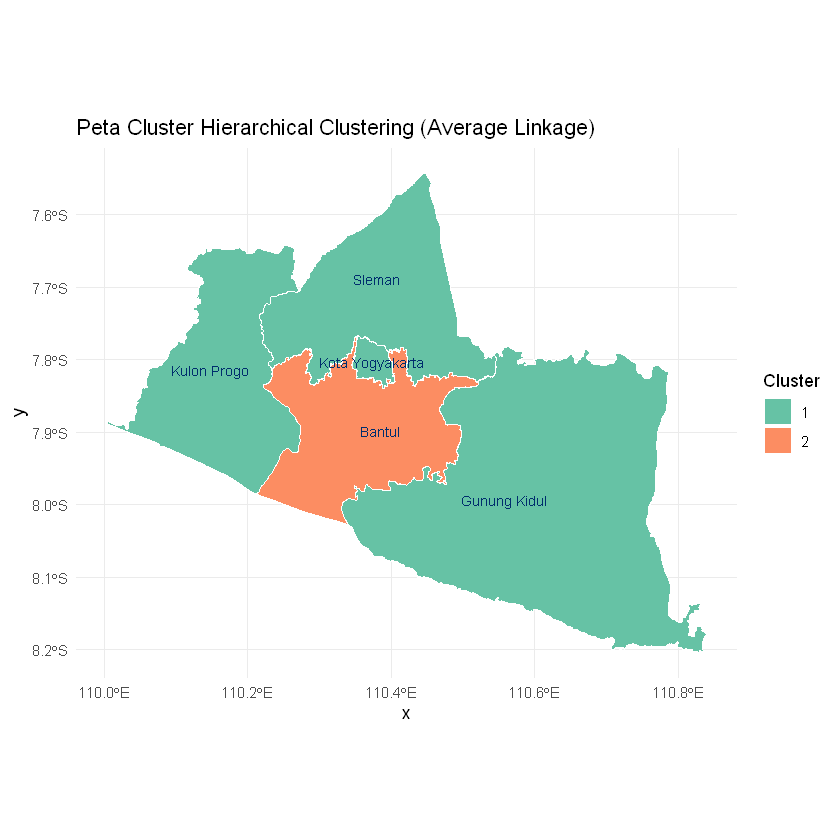

In [115]:
p1 <- ggplot(diy_map) +
  geom_sf(aes(fill = as.factor(hc_clusters)), color = "white") +
  geom_sf_text(aes(label = kab_kota), size = 3, color = "#002d6d") +
  scale_fill_brewer(palette = "Set2", name = "Cluster") +
  labs(title = "Peta Cluster Hierarchical Clustering (Average Linkage)") +
  theme_minimal()
p1

K-Means Clustering

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


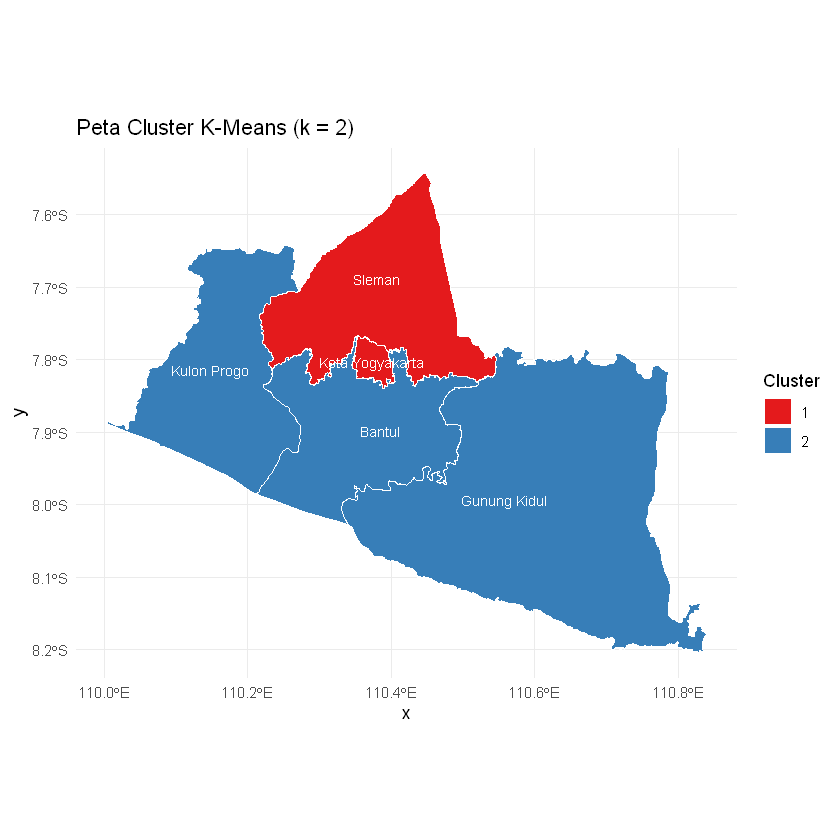

In [117]:
p2 <- ggplot(diy_map) +
  geom_sf(aes(fill = as.factor(km_clusters)), color = "white") +
  geom_sf_text(aes(label = kab_kota), size = 3, color = "#ffffff") +
  scale_fill_brewer(palette = "Set1", name = "Cluster") +
  labs(title = "Peta Cluster K-Means (k = 2)") +
  theme_minimal()
p2

DBSCAN Clustering

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


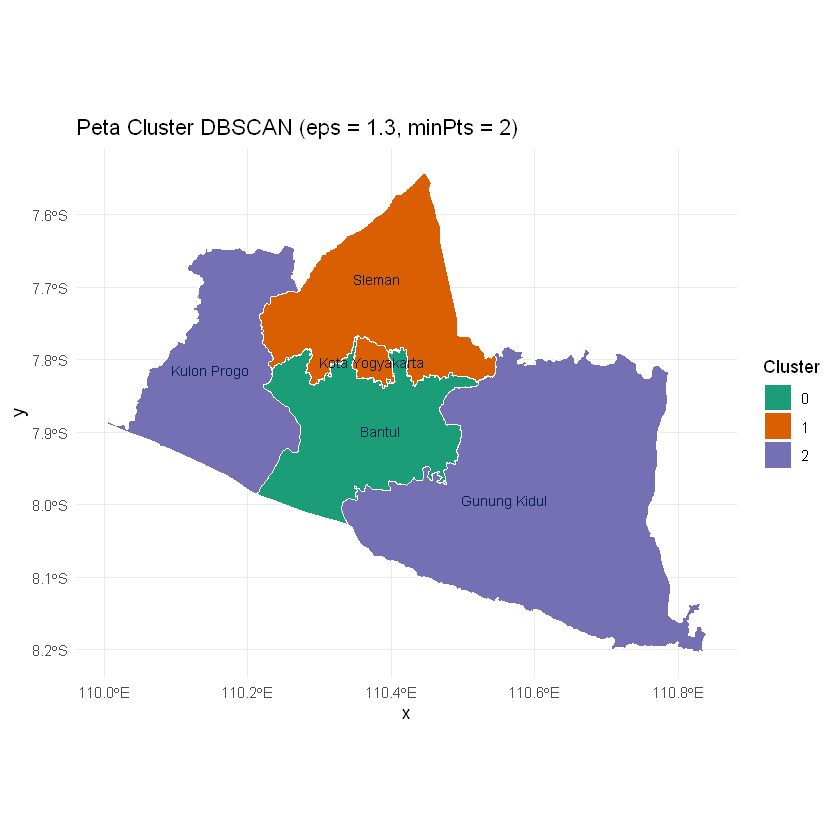

In [95]:
p3 <- ggplot(diy_map) +
  geom_sf(aes(fill = as.factor(db_clusters)), color = "white") +
  geom_sf_text(aes(label = kab_kota), size = 3, color = "#00204e") +
  scale_fill_brewer(palette = "Dark2", name = "Cluster") +
  labs(title = "Peta Cluster DBSCAN (eps = 1.3, minPts = 2)") +
  theme_minimal()
p3

Menggabungan peta dalam 1 tampilan

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


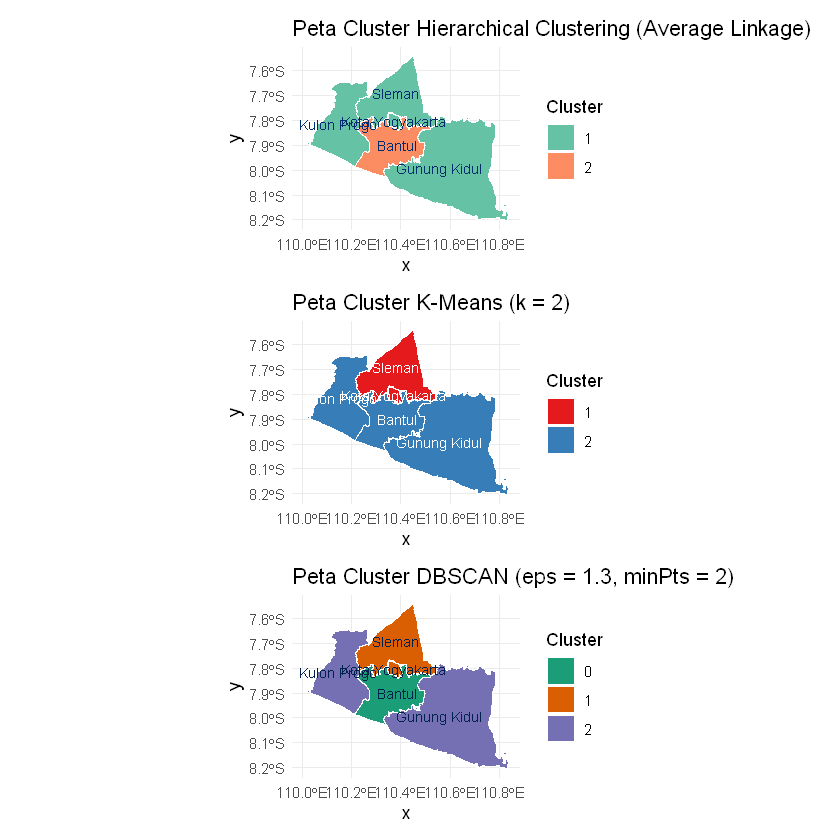

In [118]:
p1 + p2 + p3 + plot_layout(ncol = 1)


### Evaluasi Hasil Clustering

#### Menginstall dan memuat packages

In [ ]:
install.packages(c("cluster", "factoextra", "dbscan", "clValid", "clusterSim", "tidyr"))

Warning message:
"packages 'cluster', 'factoextra', 'dbscan', 'clValid' are in use and will not be installed"
Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'pixmap', 'RcppArmadillo', 'ade4'




package 'pixmap' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'ade4' successfully unpacked and MD5 sums checked
package 'clusterSim' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpkJ7LI1\downloaded_packages


In [ ]:
library(cluster)      # silhouette
library(factoextra)   # visualisasi dan db index
library(dbscan)       # dbscan
library(clValid)      # untuk davies-bouldin index
library(clusterSim)
library(ggplot2)
library(tidyr)

Warning message:
"package 'clusterSim' was built under R version 4.4.3"


Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 4.4.3"

Attaching package: 'MASS'


The following object is masked from 'package:patchwork':

    area


The following object is masked from 'package:dplyr':

    select




#### Hitung Silhouette Score

Hierarchical

  cluster size ave.sil.width
1       1    4          0.35
2       2    1          0.00


[1] 0.2822555

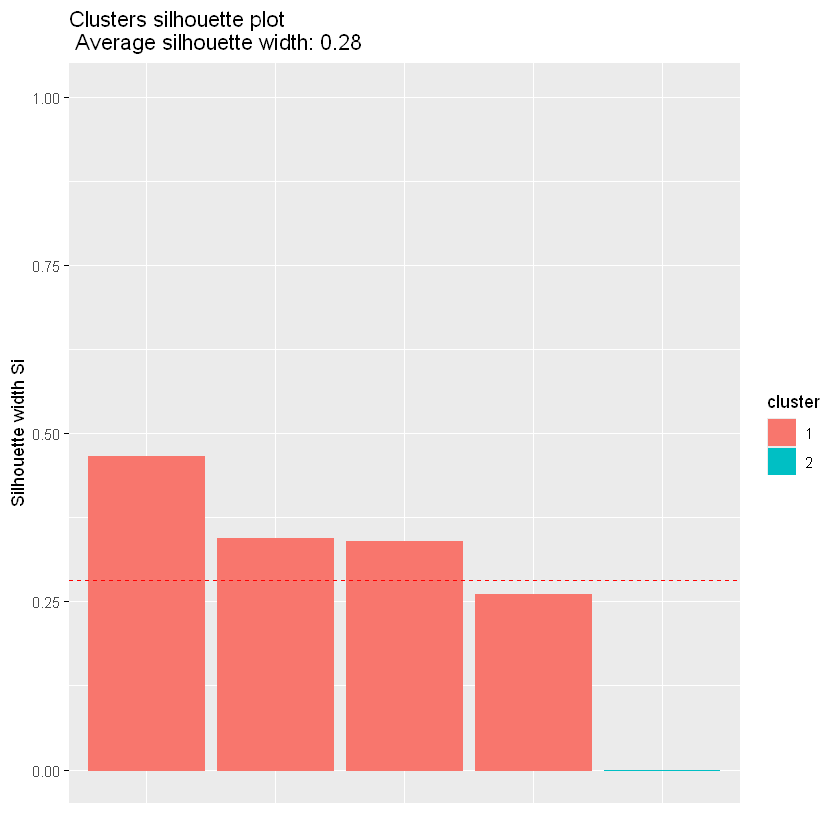

In [69]:
sil_hc <- silhouette(hc_clusters, dist(diy_scaled))
fviz_silhouette(sil_hc)
mean(sil_hc[, 3])  # rata-rata silhouette width

K-Means

  cluster size ave.sil.width
1       1    2          0.63
2       2    3          0.19


[1] 0.3677947

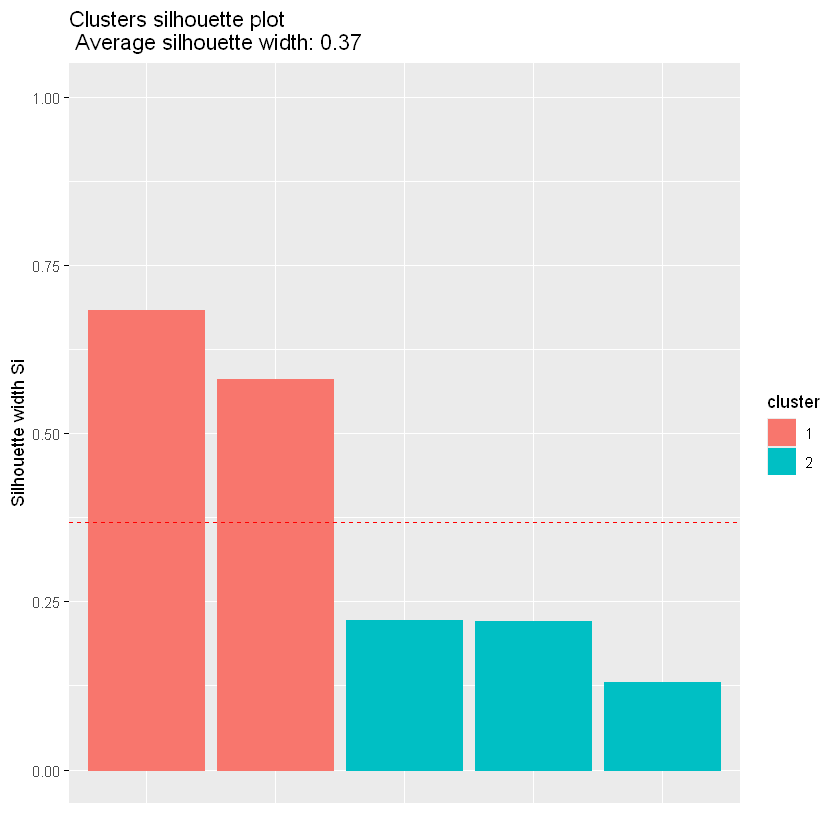

In [70]:
sil_km <- silhouette(km_clusters, dist(diy_scaled))
fviz_silhouette(sil_km)
mean(sil_km[, 3])

DBSCAN

  cluster size ave.sil.width
1       1    2          0.60
2       2    2          0.58


[1] 0.5901202

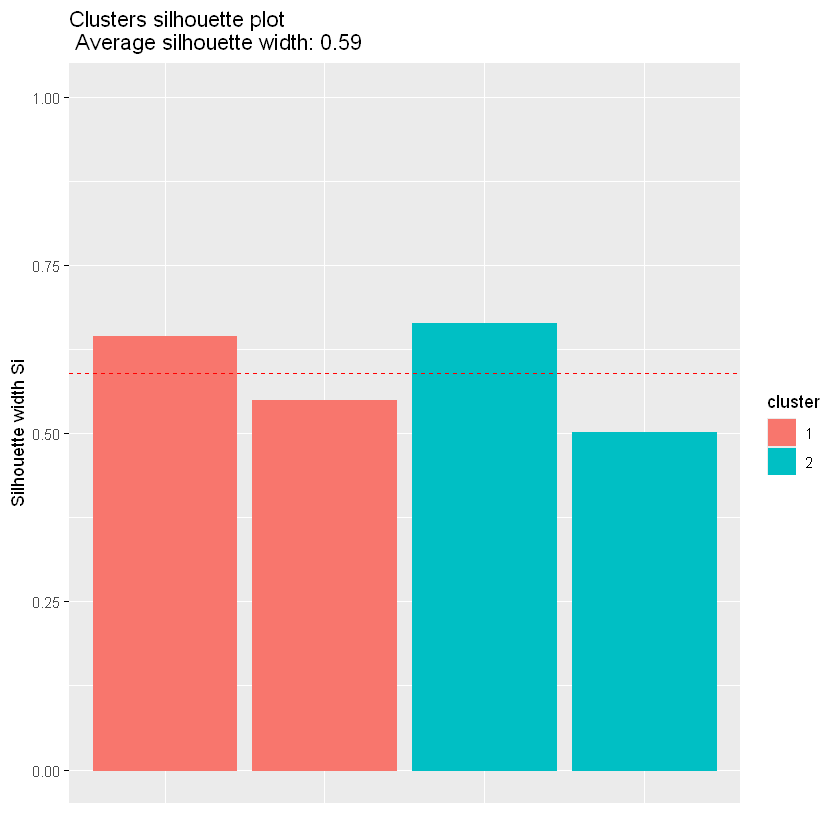

In [72]:
# Filter data yang bukan noise (cluster != 0)
idx <- db_clusters != 0

# Buat matriks jarak
dist_matrix <- as.matrix(dist(diy_scaled))

# Hitung silhouette
sil_db <- silhouette(db_clusters[idx], dist_matrix[idx, idx])

# Visualisasi
fviz_silhouette(sil_db)

# Rata-rata silhouette width
mean(sil_db[, 3])

#### Hitung Davies-Bouldin Index

In [77]:
compute_db_index <- function(data, clusters) {
  clusterSim::index.DB(data, clusters)$DB
}

db_hc <- compute_db_index(diy_scaled, hc_clusters)
db_km <- compute_db_index(diy_scaled, km_clusters)
db_db <- compute_db_index(diy_scaled[idx, ], db_clusters[idx])

db_hc
db_km
db_db

[1] 0.4676706

[1] 0.7965183

[1] 0.4049261

#### Visualisasi Perbandingan

In [82]:
results <- data.frame(
  Method = c("Hierarchical", "K-Means", "DBSCAN"),
  Silhouette = c(mean(sil_hc[,3]), mean(sil_km[,3]), mean(sil_db[,3])),
  Davies_Bouldin = c(db_hc, db_km, db_db)
)

print(results)

        Method Silhouette Davies_Bouldin
1 Hierarchical  0.2822555      0.4676706
2      K-Means  0.3677947      0.7965183
3       DBSCAN  0.5901202      0.4049261


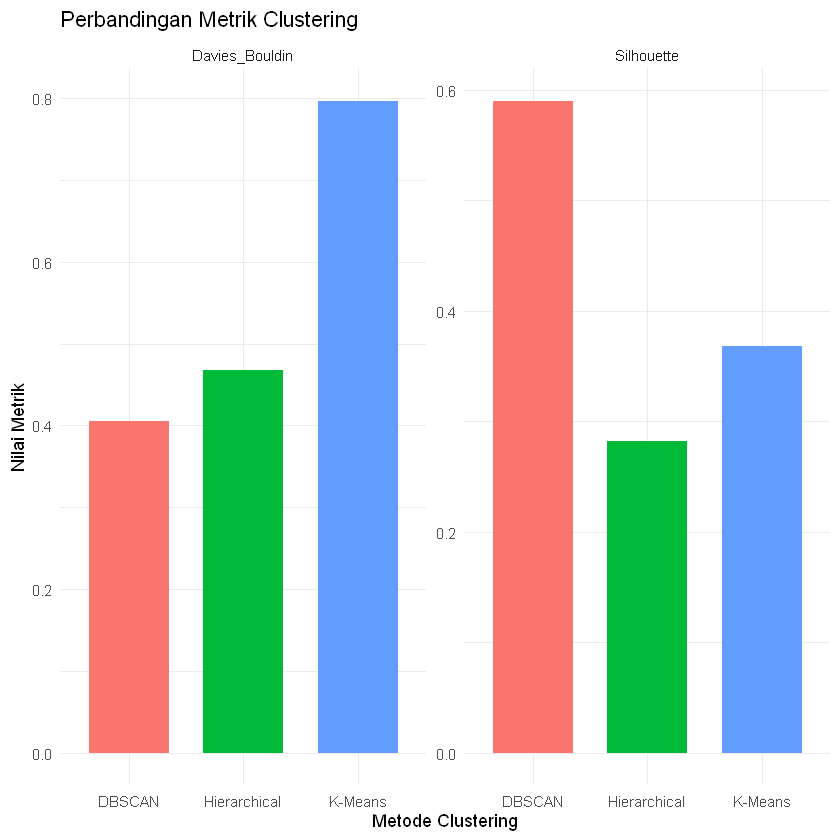

In [ ]:
# Ubah data ke format panjang (long format) supaya mudah buat plot per metrik
results_long <- pivot_longer(results, cols = -Method,
                             names_to = "Metric", values_to = "Value")
# Plot dengan facet
ggplot(results_long, aes(x = Method, y = Value, fill = Method)) +
  geom_col(position = "dodge", width = 0.7) +
  facet_wrap(~ Metric, scales = "free_y") +  # skala y beda untuk tiap metrik
  labs(title = "Perbandingan Metrik Clustering",
       y = "Nilai Metrik", x = "Metode Clustering") +
  theme_minimal() +
  theme(legend.position = "none")